__Ensemble model__ is a powerful ML model which often achieve high performances. This tutorail will illustrate first __stacking ensemble__    
Approach: we train two or more ML using a pair of x and y sets (X_1,y_1). Then we make predictions on a second X set (X_stack), y_pred_1, y_pred_2 and so on.   
These predictions, y_pred_1 and y_pred_2 becomes inputs to ML algorithm with the training output y_stack. Finally,the error can be measured on the third input set X_3, nd a ground set, y_3

In [1]:
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor

California Housing dataset is download [here]( https://github.com/ageron/handson-ml/tree/master/datasets/housing) which is tweat following information:   

* 207 values were randomly removed from the total_bedrooms column.
* An additional categorical attribute called ocean_proximity was added, indicating (very roughly) whether each block group is near the ocean, near the Bay area, inland or on an island. This allows discussing what to do with categorical data.   
Note : target is __median_houses_value__

In [39]:
df = pd.read_csv("C:\Dataset\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
# Checking missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [41]:
df=df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [5]:
bins = np.arange(6)
X = df[df.columns.difference(['median_house_value'])]
y=  df[['median_house_value']]
print(X.shape,y.shape)

(20640, 8) (20640, 1)


In [13]:
binned_y = np.digitize(y,bins)

1. Using __fillna__ method on a column with missing values

In [14]:
tmp = df.copy()

In [15]:
tmp['total_bedrooms'].fillna(tmp['total_bedrooms'].mean(),inplace=True)
tmp.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

2 . Using __Imputer__ sklearn on missing column only

In [16]:
tmp = df.copy()
tmp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [17]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy ='mean',axis=0) 
df[['total_bedrooms']]=imputer.fit_transform(df[['total_bedrooms']])

3 . Using __groupby__ from pandas data frame to fill missing values with mean in each group. We will fill missing total_bedroooms according to total_rooms and population. A reason is that a similar population of residents requires a similar number of bedrooms. To do that, we need to digitize total_rooms and population into __group__ (bin)

In [32]:
tmp = df.copy()
tmp.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

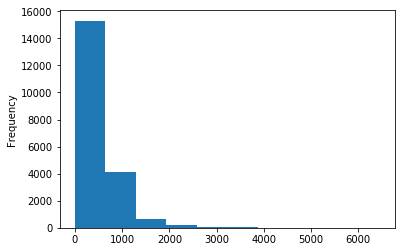

In [33]:
tmp.total_bedrooms.plot(kind='hist')

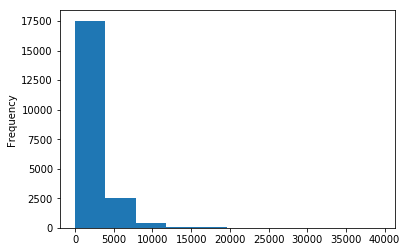

In [34]:
tmp.total_rooms.plot(kind='hist')

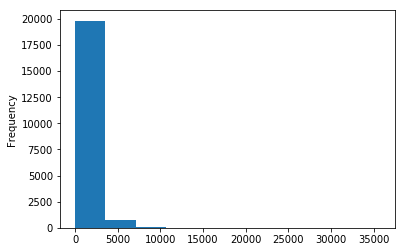

In [35]:
tmp.population.plot(kind='hist')

In [42]:
bins_1=np.linspace(min(tmp['total_rooms']),max(tmp['total_rooms']),num=4)
bins_2=np.linspace(min(tmp['population']),max(tmp['population']),num=3)

In [43]:
tmp['rooms_group']= np.digitize(tmp['total_rooms'],bins_1)
tmp['population_group']=np.digitize(tmp['population'],bins_2)
tmp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_group,population_group
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,1


In [44]:
#df['total_bedrooms'].fillna(df.groupby(["total_rooms","population"])["total_bedrooms"].transform("median"), inplace=True)
tmp['total_bedrooms'].fillna(tmp.groupby(["rooms_group","population_group"])["total_bedrooms"].transform("median"), inplace = True)
tmp.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
rooms_group           0
population_group      0
dtype: int64

__Quick note__: More advance techniques can be used to impute missing values which are illustrated in other notebooks. Here, we demontrate that we still use groupby of pandas data frame to fill missing values.   
We continute with ensemble model.
